## No EarlyStopping & Reduce LR

## Import Packages

In [24]:
!nvidia-smi

Sun Oct 30 18:13:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.50       Driver Version: 472.50       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   43C    P8    14W / 320W |   8537MiB / 10240MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import tensorflow.keras
from keras import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from keras.datasets import cifar10
from keras.utils import to_categorical,load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow_addons.optimizers import AdamW,SGDW
from sklearn.metrics import f1_score,confusion_matrix,classification_report
#Convolution Neural Networks Filter Image
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, UpSampling2D
# Convolution Auto Encoder Filter Image
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Concatenate ,Conv2DTranspose,GlobalAveragePooling2D,add,ZeroPadding2D,concatenate
from keras import optimizers
from keras.models import Model
from keras import backend as K
from keras import regularizers
from keras.layers import Input,Layer
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D ,LeakyReLU,ReLU, Concatenate,Flatten,BatchNormalization,Dropout,ReLU,LeakyReLU,PReLU
from keras import optimizers
from keras.models import Model
import gc
from sklearn.metrics import f1_score,confusion_matrix,classification_report
import collections

## Load Dataset

In [3]:
data=np.load('/Users/User/303/1_eonseung/creator_camp/final_data/224_imbalanced_x_final.npy')
labels=np.load("/Users/User/303/1_eonseung/creator_camp/final_data/224_imbalanced_y_final.npy")

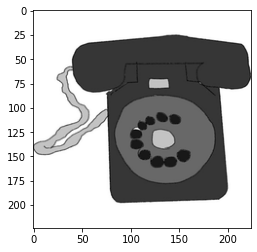

In [4]:
plt.imshow(data[4])

In [5]:
collections.Counter(labels)

Counter({1: 1893,
         2: 124,
         3: 1509,
         4: 410,
         5: 410,
         6: 422,
         7: 700,
         8: 426,
         0: 196,
         9: 364,
         10: 700,
         11: 419,
         12: 454,
         13: 180,
         14: 200,
         15: 547,
         16: 631,
         17: 2214,
         18: 402,
         19: 382})

## Train Test Split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0)

In [7]:
y_train = to_categorical(y_train,20) #원핫 인코딩
y_test=to_categorical(y_test,20) #원핫 인코딩

In [8]:
# def normalize_image(img):
#     img=img .astype('float32')
#     for i in range(len(img)):
#         img[i]= img[i]/ 255.0
#         img[i][:,:,0]-=0.485 #R
#         img[i][:,:,1]-=0.458 #G
#         img[i][:,:,2]-=0.408 #B
        
#         img[i][:,:,0]/=0.229 #R
#         img[i][:,:,1]/=0.224 #G
#         img[i][:,:,2]/=0.225 #B
#     return img

In [9]:
#final_data= normalize_image(data)

## Model : VGG16 + Residual

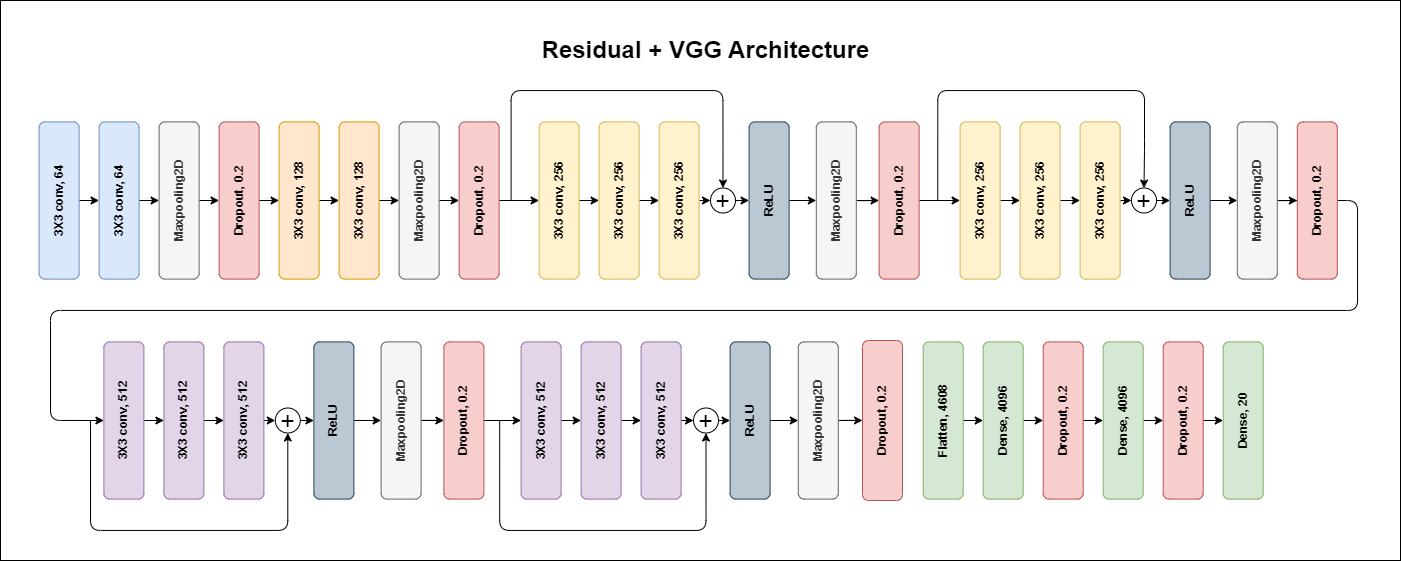

In [11]:
epochs = 40 #학습 반복 수
inChannel = 3 # 3채널 고정
x, y = 224, 224 # 바꿔서 사용
act=ReLU()
n_class = 20 #클래스 수
lr=0.0001 #learning rate- adam default
loss = 'categorical_crossentropy' #손실함수 
batch_size=32 #배치사이즈
opt=optimizers.Adam(learning_rate=lr)

In [12]:
# 모델 여기다 붙여넣기
def model_fn():
    input_img = Input(shape=(x,y,inChannel))
    vgg = Conv2D(64, (3,3),activation=act,padding='same')(input_img)
    vgg = Conv2D(64,(3,3),activation=act,padding='same')(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)

    vgg = Conv2D(128,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(128,(3,3),activation=act,padding='same')(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)

    vgg = Conv2D(256,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(256,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(256,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(256,(3,3),activation=act,padding='same')(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)

    vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)

    vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)

    vgg = Flatten()(vgg)
    vgg = Dense(4096,activation=act)(vgg)
    vgg = Dense(4096,activation=act)(vgg)
    vgg = Dense(n_class,activation='softmax')(vgg)
    vgg16 = Model(input_img , vgg)
    return vgg16

## Summary

In [15]:
model= model_fn()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['normalization[0][0]']      

 dense_1 (Dense)                (None, 4096)         16781312    ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 20)           81940       ['dense_1[0][0]']                
                                                                                                  
Total params: 52,226,644
Trainable params: 52,226,644
Non-trainable params: 0
__________________________________________________________________________________________________


## F1-Score / Epoch 

In [16]:
#https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
def F1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Model Train

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,LearningRateScheduler,Callback

#경로 바꿔주기
filename = './checkpoint/SimpleVGG-{}-batch-{}-trial.ckpt'.format(epochs, batch_size)
checkpoint = ModelCheckpoint(filename,             
                             monitor='val_F1_score',
                             save_weights_only=True,
                             verbose=1,           
                             save_best_only=True,  
                             mode='max'         
                            )

# earlystopping = EarlyStopping(monitor='val_F1_score',  
#                               patience=6,         
#                              mode='max'
#                              )
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), mode='max',cooldown=0,
#                               patience=10, min_lr=0.000000001)

In [18]:
trainGenerator = ImageDataGenerator( horizontal_flip=True, vertical_flip=True,
                    rotation_range = 10, shear_range=0.2)
trainiterator = trainGenerator.flow(x_train, y_train, batch_size=batch_size)

testGenerator = ImageDataGenerator()
testiterator = testGenerator.flow(x_test, y_test, batch_size=batch_size)

vgg16=model_fn()
vgg16.compile(loss=loss, optimizer=opt, metrics=['accuracy',F1_score],run_eagerly=True)

In [19]:
vgg_train = vgg16.fit(trainiterator,
                      epochs=epochs,
                      validation_data= testiterator, verbose=1,callbacks=[checkpoint]
                                   )

In [20]:
#모델 불러올 땐 학습 코드 꼭 주석하고 load_weights활성화
vgg16.load_weights(filename)
#vgg16.load_weights("./checkpoint/테스트용_삭제하기-70-batch-32-trial-1.ckpt")

In [21]:
pred = vgg16.predict(testiterator.x, verbose=1)

118/118 [==============================] - 8s 54ms/step


In [22]:
y_pred=[]
y_true=[]
for i in range(len(pred)):
    tmp1 = pred[i].argmax() 
    tmp2 = testiterator.y[i].argmax() 
    y_pred.append(tmp1)
    y_true.append(tmp2)

result_f1=f1_score(y_true, y_pred, average = None)

In [23]:
print("각 클래스별 F1-Score의 평균: {0} ".format(result_f1.mean()))
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=4))

각 클래스별 F1-Score의 평균: 0.9810092192448264 
[[ 64   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    1   0]
 [  0 547   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0 459   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 114   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   0 126   0   0   1   2   0   0   0   0   0   0   0   1
    0   0]
 [  0   0   1   1   2   1 132   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 193   0   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   0   0   0   0 111   0   2   0   0   0   0   0   0   0
    0   1]
 [  0   0   0   0   2   1   1   0   0  96   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   1 215   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   